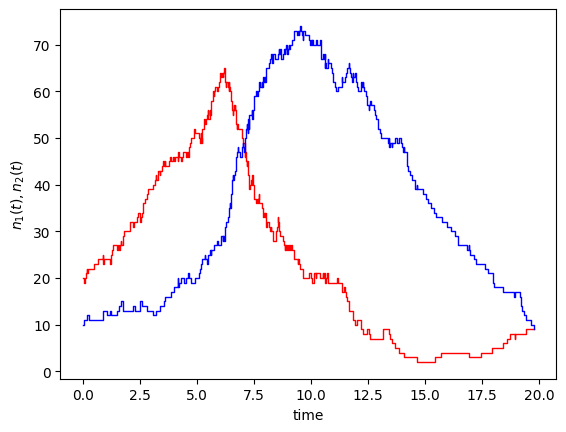

In [1]:
'''
  アルゴリズム３: ギレスピーアルゴリズム
  - Lotka-Volterra系
  - 図3.7のようなものを描画できる
'''
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
R = 3
c = [0.3, 0.01, 0.2]
# 状態に依存する関数(propensity function)の設定
gamma_r = [lambda n: c[0]*n[0],
             lambda n: c[1]*n[0]*n[1],
             lambda n: c[2]*n[1]]
# 各イベントでの状態遷移の設定
v_e = np.array([[+1, 0],
                 [-1,+1],
                 [ 0,-1]])

# 乱数の種の設定
rng = np.random.default_rng(41736)

# シミュレーションの初期設定（アルゴリズム3 1行目）
n_ini = [20, 10]
T = 20
t = 0.0
n_tilde = n_ini

# 定数 gamma0 を計算する関数（アルゴリズム3 2行目と11行目の計算に利用）
def calc_gamma0(n_tilde):
    gamma0 = 0.0
    for gamma in gamma_r:
        gamma0 = gamma0 + gamma(n_tilde)
    return gamma0

# 結果を格納するための変数
result_time = []
result_n_tilde = []
result_time.append(t)
result_n_tilde.append(n_tilde)

# 時間発展（アルゴリズムの解説参照）
pval = np.zeros(R)
gamma0 = calc_gamma0(n_tilde) # アルゴリズム3 2行目
while 1: # アルゴリズム3 3行目
    tau = rng.exponential(1.0/gamma0) # アルゴリズム3 4行目
    # 注意： 使用している乱数生成のライブラリの仕様のため、パラメータの逆数を利用
    if np.all(t+tau > T): # アルゴリズム3 5行目
        break
    t = t + tau # アルゴリズム3 8行目
    result_time.append(t) # イベント発生時刻の保存（描画のため）
    result_n_tilde.append(n_tilde) # 個数の保存（描画のため）
    # アルゴリズム3 9行目で利用するサイコロの確率の準備
    for r, gamma in enumerate(gamma_r):
        pval[r] = gamma(n_tilde)/gamma0
    e = rng.choice(R, 1, p=pval)[0] # アルゴリズム3 9行目
    n_tilde = n_tilde + v_e[e] # アルゴリズム3 10行目
    result_time.append(t) # イベント発生時刻の保存（描画のため）
    result_n_tilde.append(n_tilde) # イベント発生時刻の保存（描画のため）
    gamma0 = calc_gamma0(n_tilde) # アルゴリズム3 11行目
    # 種2がなくなると種1が増え続けるだけなので終了させる
    if np.all(n_tilde[1] == 0):
        break

# プロット： 下のコードは状態変数が2つの場合のみに対応
result_time = np.array(result_time)
result_n = np.array(result_n_tilde).T
plt.plot(result_time, result_n[0], 'r', linewidth=1)
plt.plot(result_time, result_n[1], 'b', linewidth=1)
plt.xlabel('time')
plt.ylabel('$n_1(t), n_2(t)$')
plt.show()